Pedro Ivo Vasconcelos - TP

## **Capítulo 6**

1) O controlador (K=0.2) determinado para esta atividade é:

$$C(z) = \frac{K*G(z)}{1+K*G(z)}$$

$$C(z) = \frac{\frac{0.2*0.2051}{z - 0.926}}{1 + \frac{0.2*0.2051}{z - 0.926}}$$

Simplificando:

$$C(z) = \frac{0.04102}{z - 0.88498}$$

Para calcular o Teorema do Valor Final, calculamos z=1, sendo assim calculando C(1) :

$$ C(z) = (z-1)*\frac{z}{z-1}*\frac{0.04102}{z - 0.88498} $$

$$ C(z) = z*\frac{0.04102}{z - 0.88498} $$

$$ C(1) = 1*\frac{0.04102}{z - 0.88498} $$

$$ C(1) = \frac{0.04102}{0.11502} $$

$$ C(1) = 0.3565 $$

Simulando em degrau:

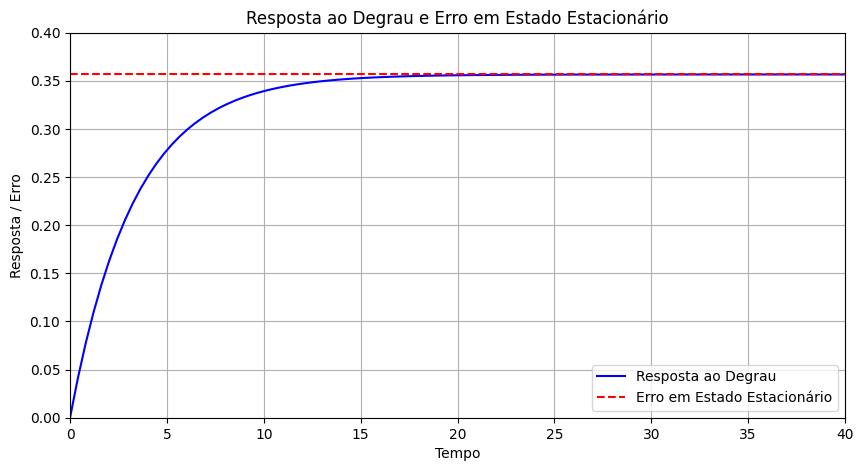

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema
num = [0.04102]
den = [1, -0.88498]
Cz = ctl.TransferFunction(num, den, True)

# Definindo o tempo de simulação
simulation_time = np.linspace(0, 40, num=100)

# Cálculo erro em estado estacionário e resposta ao degrau
s_s = ctl.step_info(Cz)['SteadyStateValue']
T, yout = ctl.step_response(Cz, simulation_time)

# Plotando a resposta ao degrau e o erro em estado estacionário
plt.figure(figsize=(10, 5))
plt.plot(T, yout, 'b-', label='Resposta ao Degrau')
plt.axhline(y=s_s, color='r', linestyle='--', label='Erro em Estado Estacionário')
plt.title('Resposta ao Degrau e Erro em Estado Estacionário')
plt.xlabel('Tempo')
plt.ylabel('Resposta / Erro')
plt.xlim(0,40)
plt.ylim(0, 0.40)
plt.legend()
plt.grid(True)
plt.show()

2- Neste exercício o objetivo é deslocar o sinal distúrbio até a entrada antes do controlador como mostrado a seguir:

<img alt="disturbio" src="anexos/disturbio.jpg" title="disturbio planta" width="500">

<img alt="disturbio" src="anexos/disturbio_desejado.jpg" title="disturbio planta 2" width="500">

Para realizar esta modificação, o resultado será pela manipulação de blocos:

$$AD(Z) = \frac{D(z)}{K}$$

Considerando entrada nula, prevalece só distúrbio:

$$ C(z) = AD(Z)*\frac{0.04102}{z - 0.88498} $$

$$ C(z) = \frac{D(Z)}{K}*\frac{0.04102}{z - 0.88498} $$

$$ C(z) = \frac{D(Z)}{0.2}*\frac{0.04102}{z - 0.88498} $$

$$ C(z) = \frac{0.2051*D(Z)}{z - 0.88498} $$

Verficando o resultado considerando o distúrbio como 1, logo:

$$ C_D(z) = \frac{0.2051}{z - 0.88498} $$

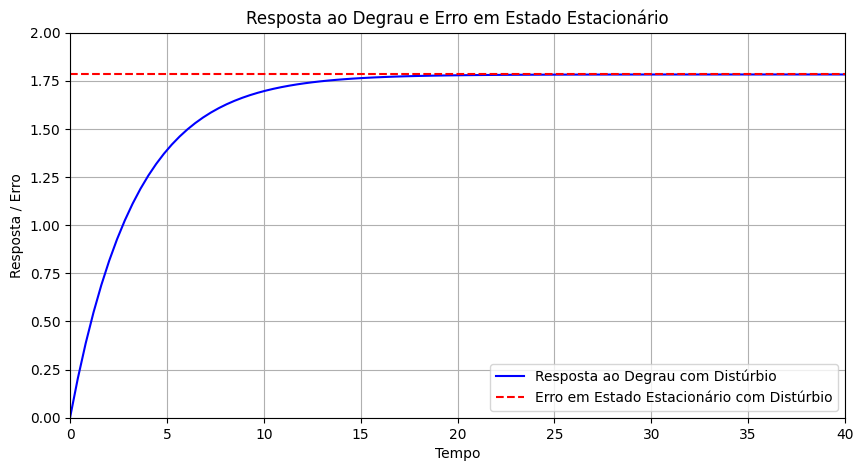

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema com Distúrbio
num = [0.2051]
den = [1, -0.88498]
CDz = ctl.TransferFunction(num, den, True)

# Definindo o tempo de simulação
simulation_time = np.linspace(0, 40, num=100)

# Cálculo erro em estado estacionário e resposta ao degrau com Distúrbio
s_s = ctl.step_info(CDz)['SteadyStateValue']
T, yout = ctl.step_response(CDz, simulation_time)

# Plotando a resposta ao degrau e o erro em estado estacionário com Distúrbio
plt.figure(figsize=(10, 5))
plt.plot(T, yout, 'b-', label='Resposta ao Degrau com Distúrbio')
plt.axhline(y=s_s, color='r', linestyle='--', label='Erro em Estado Estacionário com Distúrbio')
plt.title('Resposta ao Degrau e Erro em Estado Estacionário')
plt.xlabel('Tempo')
plt.ylabel('Resposta / Erro')
plt.xlim(0,40)
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()

3- De maneira teórica o tempo de acomodação é definido sendo T = 10s para uma faixa de 2%, para encontrar o tempo se realiza o cálculo abaixo:

$$ T_s = \frac{ln(0.02)}{ln(0.88498)} $$

$$ T_s = \frac{ln(0.02)}{ln(0.88498)}$$

$$ T_s = 32.016s $$

A seguir realizando por meio da função step_info da biblioteca control do python o valor encontrado é de 10 para o tempo de acomodação, o motivo para esta discrepância se deve a forma que a biblioteca executa em tempo discreto, enquanto a de cima calcula em tempo contínuo usando a FT da planta discreta em Z.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema
num = [0.2051]
den = [1, -0.88498]
Cz = ctl.TransferFunction(num, den, True)

# Definindo o tempo de simulação
simulation_time = np.linspace(0, 40, num=100)

# Cálculo erro em estado estacionário e resposta ao degrau
degrau = ctl.step_info(Cz, simulation_time)
t_ss = degrau['SettlingTime']
print(f"Tempo de acomodação é: {t_ss}")

Tempo de acomodação é: 13.333333333333334


Demonstração usando outro método por meio de steps:

In [25]:
Y_anterior, Y_atual = 0, 0
amostras = 1
while Y_atual < .3492:
    Y_atual = Y_anterior * .88498 + .04102
    Y_anterior = Y_atual
    print(f"Y_atual: {Y_atual:.4f} | Y_anterior: {Y_anterior:.4f} | nº amostras: {amostras}")
    amostras=amostras+1

Y_atual: 0.0410 | Y_anterior: 0.0410 | nº amostras: 1
Y_atual: 0.0773 | Y_anterior: 0.0773 | nº amostras: 2
Y_atual: 0.1094 | Y_anterior: 0.1094 | nº amostras: 3
Y_atual: 0.1379 | Y_anterior: 0.1379 | nº amostras: 4
Y_atual: 0.1630 | Y_anterior: 0.1630 | nº amostras: 5
Y_atual: 0.1853 | Y_anterior: 0.1853 | nº amostras: 6
Y_atual: 0.2050 | Y_anterior: 0.2050 | nº amostras: 7
Y_atual: 0.2225 | Y_anterior: 0.2225 | nº amostras: 8
Y_atual: 0.2379 | Y_anterior: 0.2379 | nº amostras: 9
Y_atual: 0.2515 | Y_anterior: 0.2515 | nº amostras: 10
Y_atual: 0.2636 | Y_anterior: 0.2636 | nº amostras: 11
Y_atual: 0.2743 | Y_anterior: 0.2743 | nº amostras: 12
Y_atual: 0.2838 | Y_anterior: 0.2838 | nº amostras: 13
Y_atual: 0.2922 | Y_anterior: 0.2922 | nº amostras: 14
Y_atual: 0.2996 | Y_anterior: 0.2996 | nº amostras: 15
Y_atual: 0.3061 | Y_anterior: 0.3061 | nº amostras: 16
Y_atual: 0.3120 | Y_anterior: 0.3120 | nº amostras: 17
Y_atual: 0.3171 | Y_anterior: 0.3171 | nº amostras: 18
Y_atual: 0.3216 | Y

Aqui está o cálculo utilizado para chegar no procedimento anterior:

$$ \frac{Y(z)}{R(z)} = \frac{0.12354}{z - 0.65346} $$

$$ z*Y(z) - 0.65346*Y(z) = 0.12354*R(z) $$

$$ Y(z) - 0.65346*z^{-1}*Y(z) = 0.12354*z^{-1}*R(z) $$

$$ Y[k] - 0.65346*Y[k-1] = 0.12354*R[k-1] $$

$$ Y[k] = 0.12354*R[k-1] + 0.65346*Y[k-1] $$

4- Por conta da caracteristica do sistema discreto haverá sobressinal e pode ser estimado utilizando solução númerica e analítica utilizando a fórmula de primeira ordem para o sistema contínuo:

Planta:  $$G(s) = \frac{2.77}{(130s +1)}$$

Planta discretizada com controlador: $$C_{ma}(z) = \frac{K * 0.20508781}{(z - 0.92596108)}$$

Sistema M.F.:  $$C_{mf}(z) = \frac{K * 0.20508781}{(z - 0.92596108 + K * 0.20508781)}$$

K encontrado: 5.49

-------

K = 5.45, Sobressinal: 19.18%
K = 5.46, Sobressinal: 19.38%
K = 5.47, Sobressinal: 19.59%
K = 5.48, Sobressinal: 19.79%
K = 5.49, Sobressinal: 20.00%
K = 5.50, Sobressinal: 20.20%
Valor ideal abaixo de 20% = 5.49


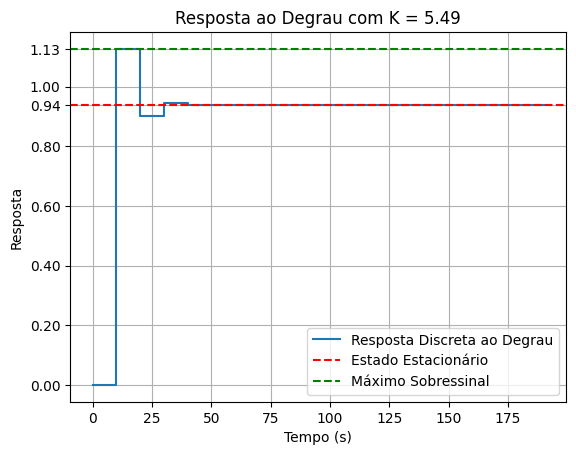

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import control as ctl

# Parâmetros iniciais
k = 5.45
desired_overshoot = 20
sampling_time = 10

def create_system(k):
    num = [k * 0.20508781]
    den = [1, -0.92596108]
    Gz_k = ctl.TransferFunction(num, den, sampling_time)
    return ctl.feedback(Gz_k, 1)

# Executar a simulação e ajustar K
while True:
    # Simulação de resposta ao degrau
    Cz_k = create_system(k)
    time, response = ctl.step_response(Cz_k)
    steady_state = response[-1] # Último valor é considerado o estado estacionário
    overshoot = (max(response) - steady_state) / steady_state * 100 # Calculando sobressinal percentual
    print(f"K = {k:.2f}, Sobressinal: {overshoot:.2f}%")

    # Critério de parada
    if overshoot > desired_overshoot:
        k -= 0.01
        print(f"Valor ideal abaixo de 20% = {k:.2f}")
        break  # Interrompe o loop se o sobressinal exceder o limite
    k += 0.01  # Incrementa K

# Simulação final com o K ajustado
Cz_k = create_system(k)
time, response = ctl.step_response(Cz_k)
steady_state = ctl.step_info(Cz_k)['SteadyStateValue']
max_value = max(response)

# Plotar a resposta ao degrau final com o K que minimiza ts sem exceder o sobressinal
plt.figure()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.yticks(list(plt.yticks()[0]) + [max_value, steady_state])
plt.step(time, response, where='post', label='Resposta Discreta ao Degrau')
plt.axhline(y=steady_state, color='r', linestyle='--', label='Estado Estacionário')
plt.axhline(y=max(response), color='g', linestyle='--', label='Máximo Sobressinal')
plt.title(f"Resposta ao Degrau com K = {k:.2f}")
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid(True)
plt.show()

5- 